<a href="https://colab.research.google.com/github/nivethaakm99/MNIST-/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#importing the necessary packages

import math
import numpy as np
import h5py
from matplotlib.pyplot import imshow
import scipy
from keras.datasets import mnist
from keras import layers
from keras.layers import Input, ZeroPadding2D, Conv2D, BatchNormalization, Activation, Dense, Flatten, MaxPooling2D
from keras.models import Model, Sequential
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import cv2

In [14]:
# Loading the dataset 

(xtrain,ytrain),(xtest,ytest)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [15]:
#Normlize and reshaping the dataset

xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], xtrain.shape[2], 1).astype('float32')
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], xtest.shape[2], 1).astype('float32')

xtrain = xtrain/255
xtest = xtest/255 

input_shape = xtrain.shape[1:]

In [16]:
print("xtrain:",xtrain.shape)
print("ytrain:",ytrain.shape)
print("xtest:",xtest.shape)
print("ytest:",ytest.shape)
print("model input shape:",input_shape)

xtrain: (60000, 28, 28, 1)
ytrain: (60000,)
xtest: (10000, 28, 28, 1)
ytest: (10000,)
model input shape: (28, 28, 1)


In [17]:
#defining the model

def mnist_model(input_shape):
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2,2))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2,2))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(10, activation='softmax'))
  return model


In [18]:
mnist_model = mnist_model(input_shape)
mnist_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
history=mnist_model.fit(xtrain, ytrain, epochs=10, batch_size=250, validation_split=0.2)

Epoch 1/10
192/192 [==============================] - 51s 267ms/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0166 - val_accuracy: 0.9942
Epoch 2/10
192/192 [==============================] - 51s 264ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.0065 - val_accuracy: 0.9979
Epoch 3/10
192/192 [==============================] - 50s 262ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0041 - val_accuracy: 0.9987
Epoch 4/10
192/192 [==============================] - 50s 262ms/step - loss: 3.5916e-04 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 0.9991
Epoch 5/10
192/192 [==============================] - 50s 262ms/step - loss: 2.0566e-04 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 0.9992
Epoch 6/10
192/192 [==============================] - 50s 263ms/step - loss: 1.4787e-04 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 7/10
192/192 [==============================] - 51s 263ms/step - loss: 1.1301e-04 - accuracy: 1.0000 - val_loss:

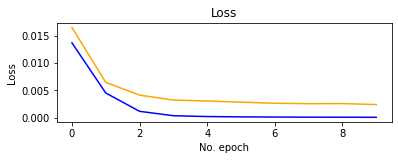

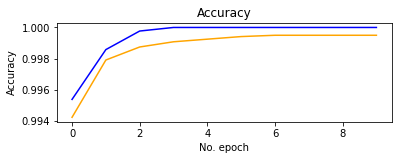

In [50]:
#loss and accuracy of training and validation 

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.show()
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.show()

In [52]:
#evaluation and saving the model

loss,accuracy = mnist_model.evaluate(xtest, ytest, verbose=0)
print("loss=",loss)
print("accuracy=",accuracy)

mnist_model.save_weights("mnist_model.h5")
print("Model Saved!")

loss= 0.025104139000177383
accuracy= 0.9932000041007996
Model Saved!


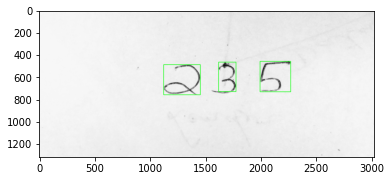

In [37]:
#Detecting the digits in the image to classify them seperately.
#the threshold is set high(212) since the handwritten digits is not dark enough.

image = cv2.imread('predict.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
grey = cv2.GaussianBlur(grey, (7, 7), 0)
ret, thresh = cv2.threshold(grey.copy(), 212, 300, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []
rect_areas = []

#to eliminate the unwanted noises, the mean of all the bounding boxes is considered
for c in contours:
    (x, y, w, h) = cv2.boundingRect(c)
    rect_areas.append(w * h)
avg_area = np.mean(rect_areas)
    
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cnt_area = w * h
    if not cnt_area < 0.5 * avg_area:
            
            cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=4)
            digit = thresh[y:y+h, x:x+w]
            resized_digit = cv2.resize(digit, (18,18))
            padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
            preprocessed_digits.append(padded_digit)

plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

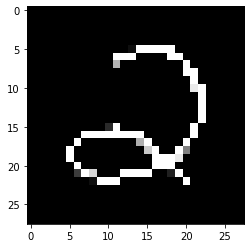

Digit:2


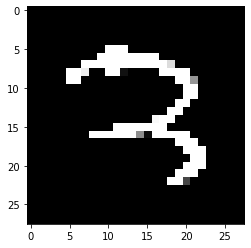

Digit:3


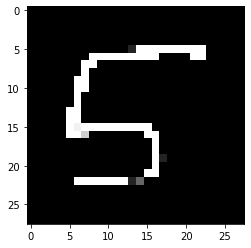

Digit:5


----------------------PREDICTED OUTPUT--------------------

2 3 5


In [38]:
#Output

ans= []
for digit in preprocessed_digits:
    prediction = mnist_model.predict(digit.reshape(1, 28, 28, 1)) 
    plt.subplot()
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("Digit:{}".format(np.argmax(prediction)))
    ans.append(np.argmax(prediction))
print("\n\n----------------------PREDICTED OUTPUT--------------------\n")
print(*ans)